In [72]:
### from __future__ import print_function
import pandas as pd
import numpy as np
import os
import pickle
import os.path
from datetime import datetime
import pyarrow
import matplotlib.pyplot as plt
%matplotlib inline
font = {'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

#set ggplot style
plt.style.use('ggplot')

In [73]:
# Dynamic parameters
data_dir  = './data/' + str(datetime.date(datetime.now()))
agg_file  = 'agg_data_{}.parquet.gzip'.format(datetime.date(datetime.now()))
trend_file  = 'trend_{}.csv'.format(datetime.date(datetime.now()))

print(trend_file)

# import data
agg_df = pd.read_parquet(os.path.join(data_dir, agg_file))
daily_df = pd.read_csv(os.path.join(data_dir, trend_file))

#Create place to save diagrams
image_dir = './images/'
if not os.path.exists(image_dir):
    os.mkdir(image_dir)

trend_2020-02-18.csv


In [74]:
# Convert types
for col in ['confirmed', 'deaths', 'recovered']:
    agg_df[col] = agg_df[col].replace('', 0).astype(int)

# Trend Lines

In [75]:

# Plot and save trendline graph
def create_trend_line(tmp_df, col, col2, col3):
    fig, ax = plt.subplots(figsize=(20,10))
    tmp_df.groupby(['date'])[[col, col2, col3]].sum().plot(ax=ax, marker='o')
    fig = ax.get_figure()
    fig.savefig(os.path.join(image_dir, '{}_trendline.jpg'.format(col)))

# Plot and save trendline graph
def MA_trend_line(tmp_df, col, col2):
    fig, ax = plt.subplots(figsize=(20,10))
    tmp_df.groupby(['date'])[[col, col2]].sum().plot(ax=ax)
    fig = ax.get_figure()
#     fig.savefig(os.path.join(image_dir, '{}_trendline.jpg'.format(col)))    

# Plot and save trendline graph
def exp_MA_trend_line(tmp_df, col, col2):
    fig, ax = plt.subplots(figsize=(20,10))
    tmp_df.groupby(['date'])[[col, col2]].sum().plot(ax=ax)
    fig = ax.get_figure()
#     fig.savefig(os.path.join(image_dir, '{}_trendline.jpg'.format(col)))    
    
def create_bar(tmp_df, col, rgb):
    fig, ax = plt.subplots(figsize=(20,10))
    tmp = tmp_df.head(30).groupby(['date'])[[col]].sum()
    tmp.plot.bar(ax=ax, rot=45, color=rgb)
    fig = ax.get_figure()
    fig.savefig(os.path.join(image_dir, '{}_bar.jpg'.format(col)))
    
    
def create_stacked_bar(tmp_df, col1, col2, fig_title):
    tmp_df = tmp_df.set_index('date')
    fig, ax = plt.subplots(figsize=(20,10))
    tmp_df[[col2, col1]].plot.bar(ax=ax,
                                  rot=45,
                                  stacked=True,
                                  title=fig_title);
    fig = ax.get_figure()
    fig.savefig(os.path.join(image_dir, '{}_stacked_bar.jpg'.format(col2)))

In [76]:
daily_df.head()

,Unnamed: 0,new_confirmed_cases,new_deaths,new_recoveries,date,confirmed_MA,deaths_moving_MA,recovered_moving_MA,confirmed_exp_MA,deaths_moving_exp_MA,recovered_moving_exp_MA,currently_infected,delta
0,0,555,17,28,2020-01-22,NaN,NaN,NaN,555.000000,17.000000,28.000000,510,-45
1,1,98,1,2,2020-01-23,326.5,9.0,15.0,212.250000,5.000000,8.500000,605,-48
2,2,288,8,6,2020-01-24,193.0,4.5,4.0,264.692308,7.076923,6.769231,879,-62
3,3,497,16,3,2020-01-25,392.5,12.0,4.5,421.500000,13.100000,4.225000,1357,-81
4,4,680,14,13,2020-01-26,588.5,15.0,8.0,594.545455,13.702479,10.099174,2010,-108


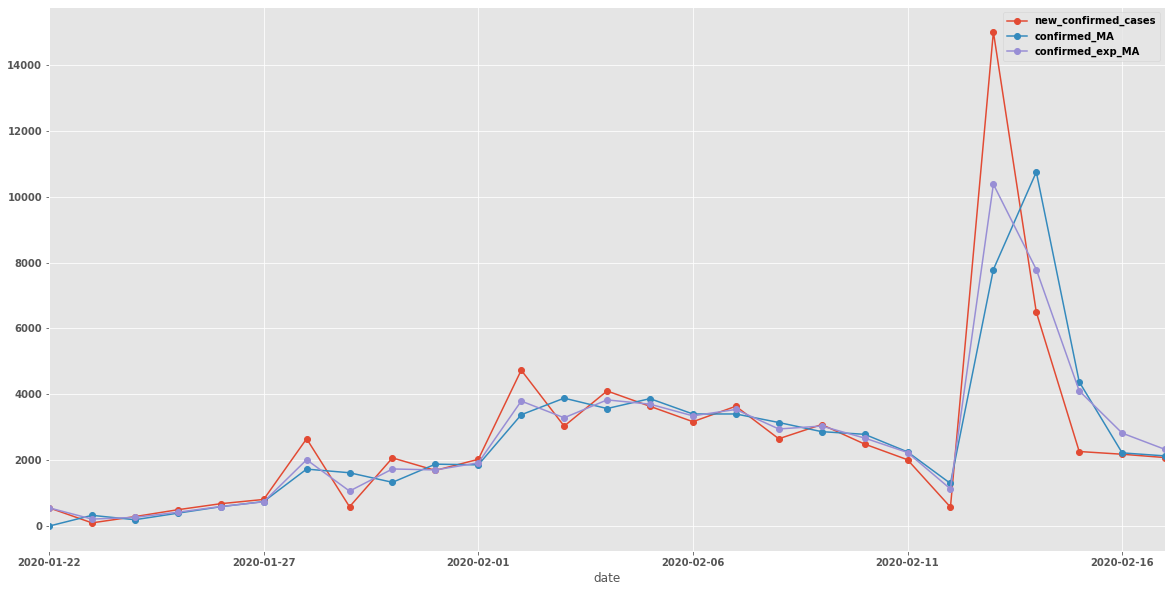

In [77]:
create_trend_line(daily_df, 'new_confirmed_cases', 'confirmed_MA', 'confirmed_exp_MA')

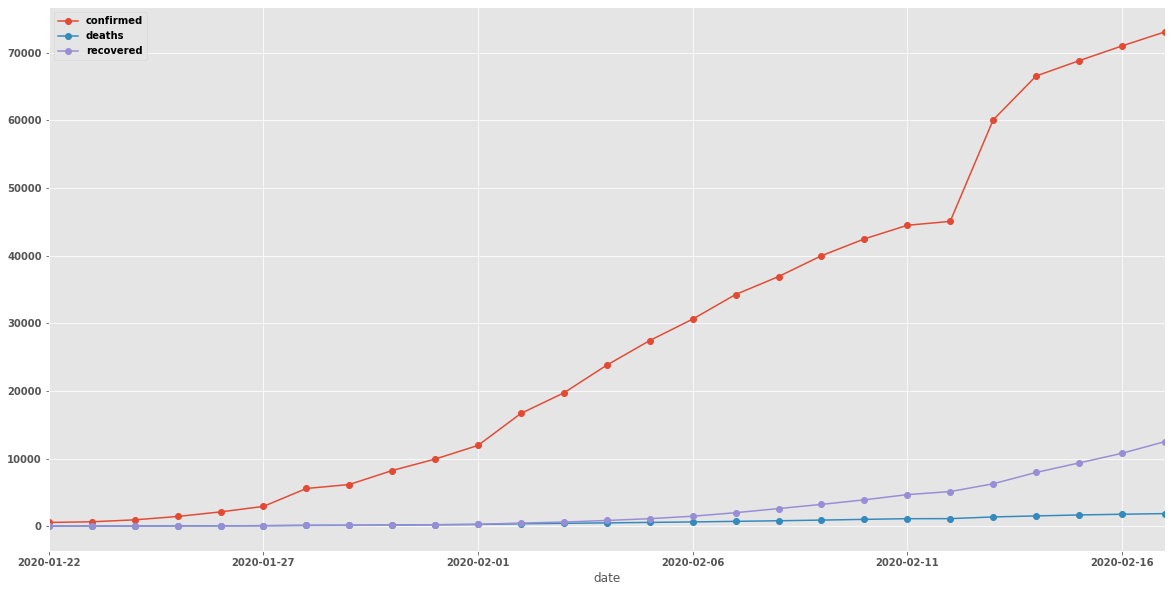

In [47]:
create_trend_line(agg_df, 'confirmed', 'deaths', 'recovered')

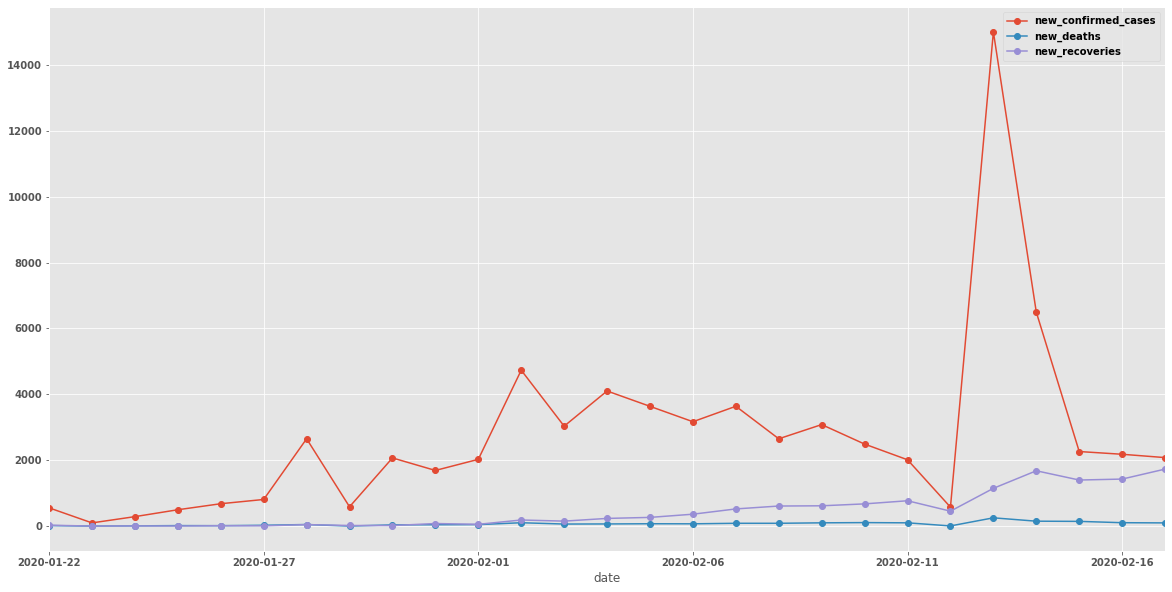

In [48]:
create_trend_line(daily_df, 'new_confirmed_cases', 'new_deaths', 'new_recoveries')

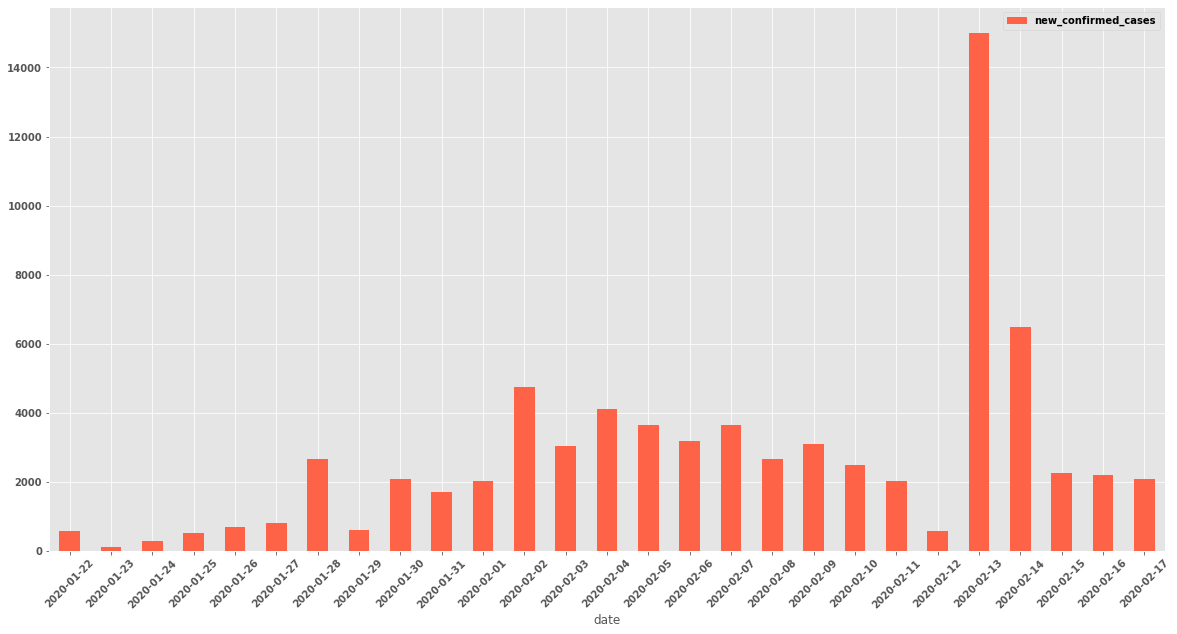

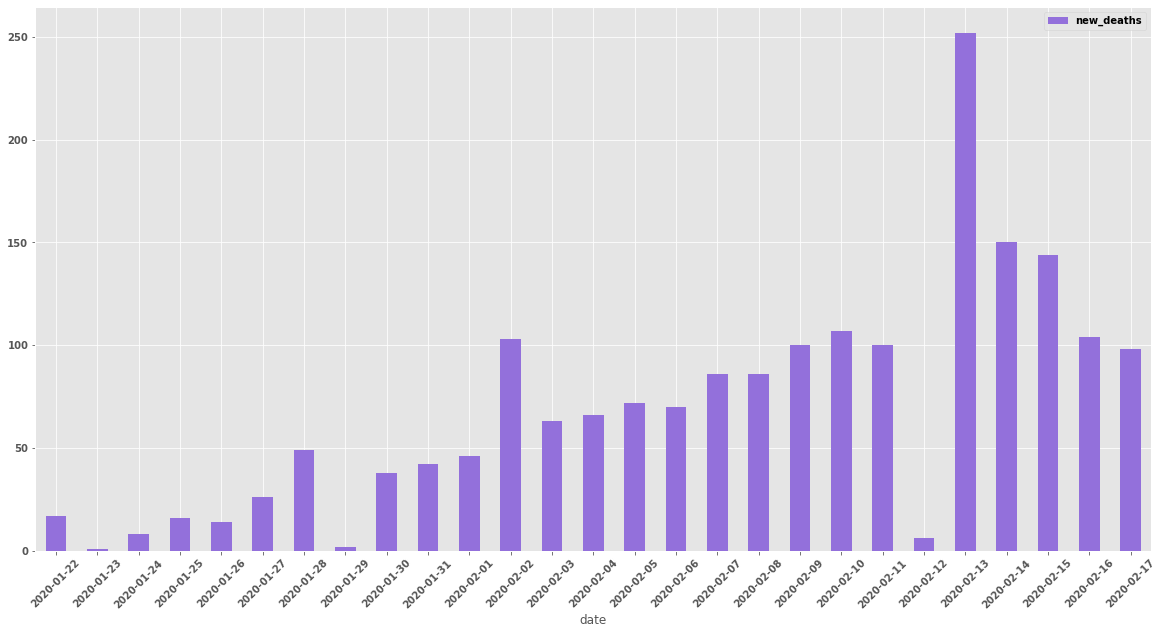

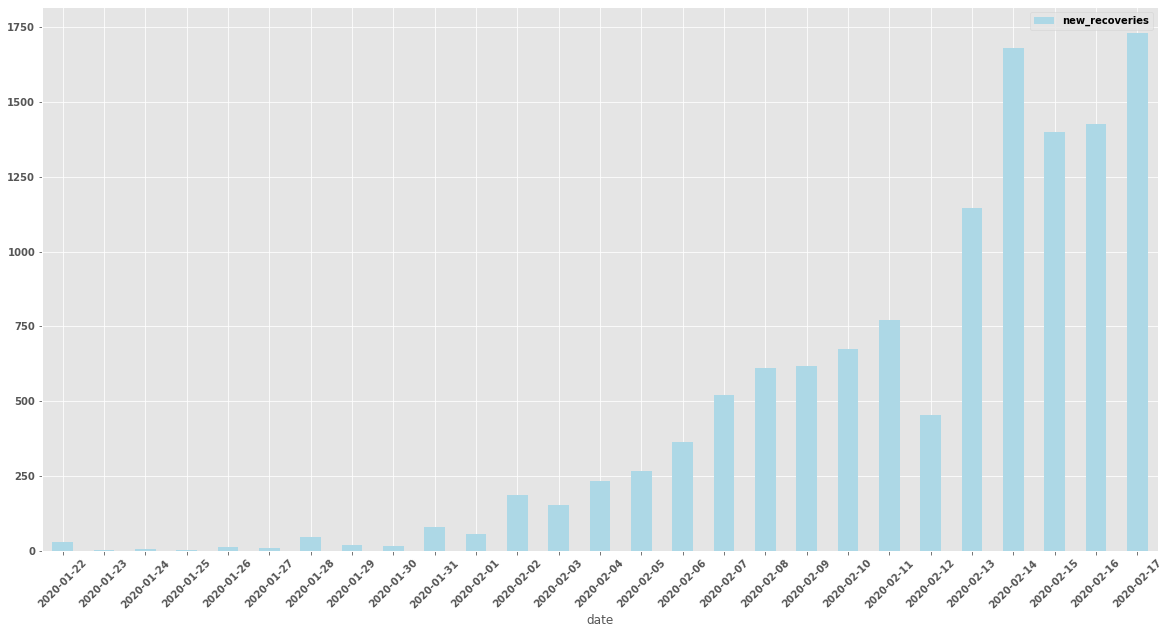

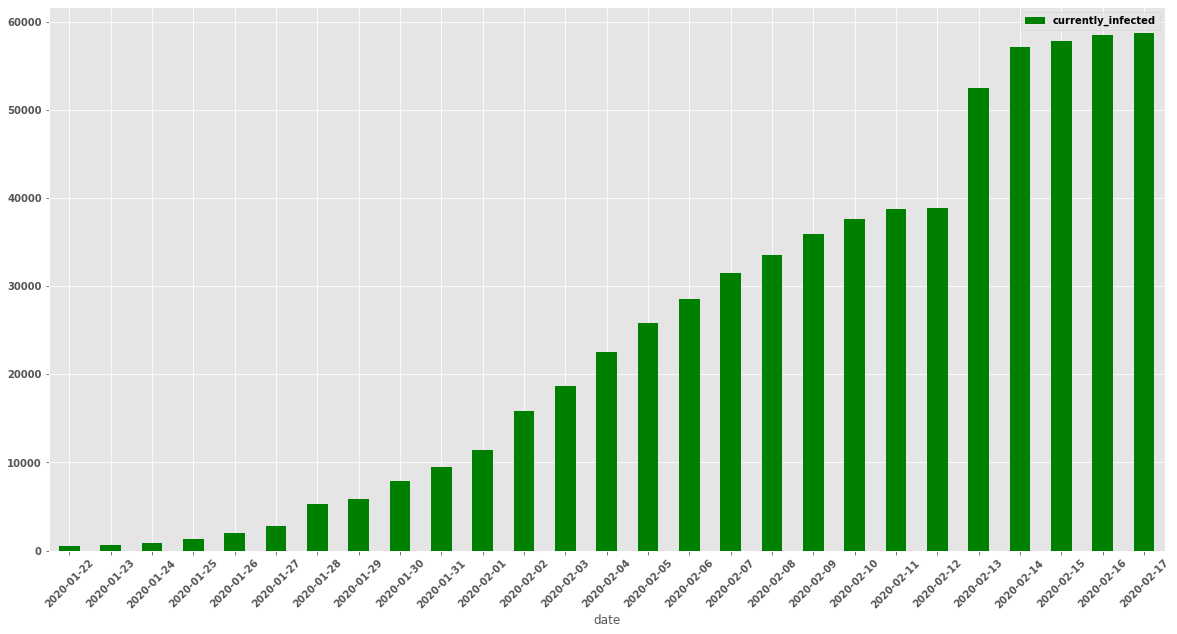

In [49]:
# Daily Figures Data Plots
daily_figures_cols = ['new_confirmed_cases', 'new_deaths', 'new_recoveries', 'currently_infected']
for col, rgb in zip(daily_figures_cols, ['tomato', 'mediumpurple', 'lightblue', 'green']):
    create_bar(daily_df, col, rgb)    
    
    
# create_bar(daily_df, col)    

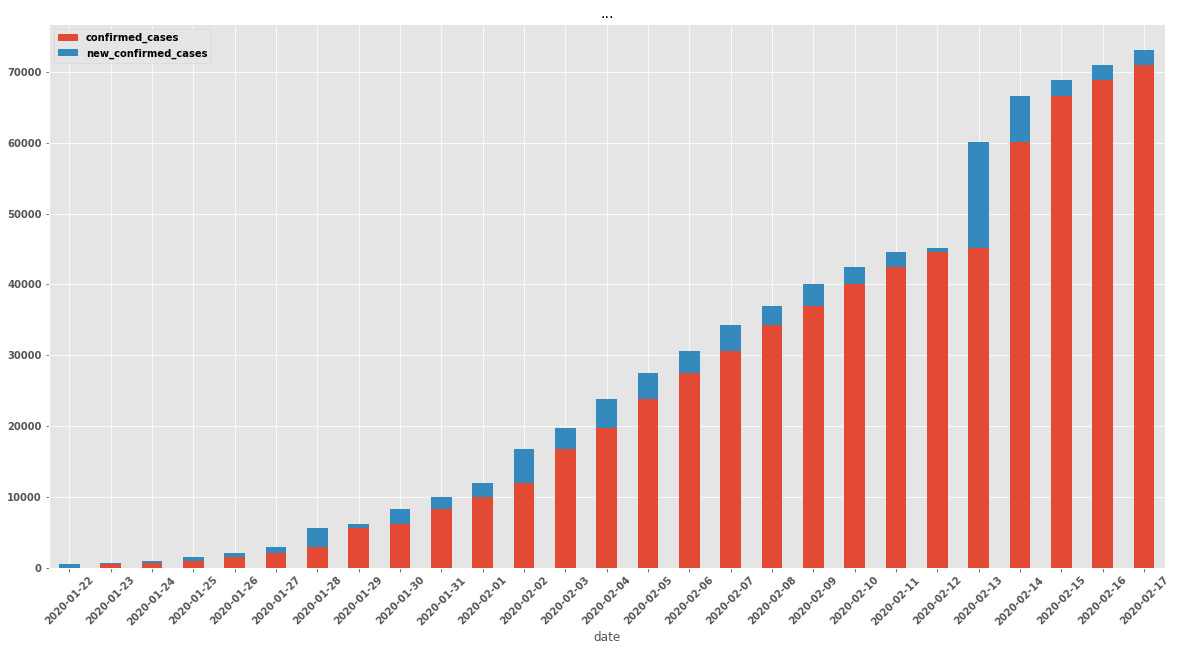

In [50]:
new_df = pd.DataFrame([])
new_df['date'] = daily_df['date']
new_df['confirmed_cases'] = agg_df.groupby(['date']).confirmed.sum().values - daily_df.new_confirmed_cases
new_df['new_confirmed_cases'] = daily_df.new_confirmed_cases

create_stacked_bar(new_df, 'new_confirmed_cases', 'confirmed_cases', "...")


## Geomapping 

In [12]:
china_df = agg_df[(agg_df.country == 'Mainland China') | (agg_df.country == 'China')]

In [15]:
china_df

,confirmed,country,date,deaths,province,recovered
15,0,China,2020-01-22,0,Inner Mongolia,0
14,4,China,2020-01-22,0,Hunan,0
13,444,China,2020-01-22,0,Hubei,0
12,0,China,2020-01-22,0,Hong Kong,0
11,5,China,2020-01-22,0,Henan,0
...,...,...,...,...,...,...
14,87,Mainland China,2020-01-30,0,Guangxi,2
28,14,Mainland China,2020-01-30,0,Jilin,1
33,1,Mainland China,2020-01-30,0,Tibet,0
31,8,Mainland China,2020-01-30,0,Qinghai,0


In [18]:
# Rename all china values
china_df['country'] = ['China' for x in china_df.country]

/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
china_df

,confirmed,country,date,deaths,province,recovered
15,0,China,2020-01-22,0,Inner Mongolia,0
14,4,China,2020-01-22,0,Hunan,0
13,444,China,2020-01-22,0,Hubei,0
12,0,China,2020-01-22,0,Hong Kong,0
11,5,China,2020-01-22,0,Henan,0
...,...,...,...,...,...,...
14,87,China,2020-01-30,0,Guangxi,2
28,14,China,2020-01-30,0,Jilin,1
33,1,China,2020-01-30,0,Tibet,0
31,8,China,2020-01-30,0,Qinghai,0
